Optimized Parameters: [6.85295576e-02 1.20251258e+02 2.59602629e+00 5.00000000e+00]


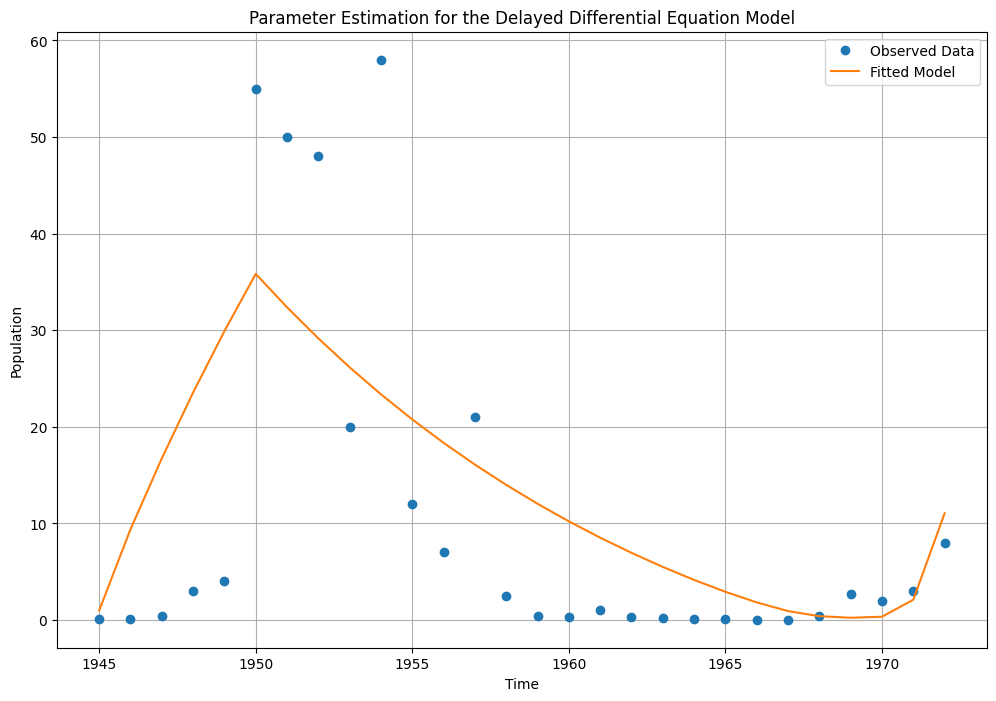

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def dde_model(y,t,params,history,t_index):
  A,B,C, tau = params
  if t_index >= 0 and t_index < len(history):
        y_tau = history[t_index]
  else:
        y_tau = 0
  dydt = -A * y - (y**2) / (1 + y**2) + B * y_tau * np.exp(-C * y_tau)
  return dydt

def solve_dde(params,time):
  A, B, C, tau = params
  dt = time[1] - time[0]
  n_steps = len(time)
  y_history = np.zeros(n_steps)
  y_history[0] = 1.0
  for i in range(1, n_steps):
      delay_steps = int(np.round(params[3] / dt))
      t_index = max(0, i - delay_steps)
      dydt = dde_model(y_history[i - 1], time[i], params, y_history[:i], t_index)
      y_history[i] = y_history[i - 1] + dydt * dt

  return y_history

def fitting(t,A,B,C, tau):
  params = [A,B,C, tau]
  simulated_values  = solve_dde(params,t)
  return simulated_values

observed_time = np.linspace(1945, 1972, num=28)
observed_data = np.array([.07, .09, .4, 3, 4, 55, 50, 48, 20, 58, 12, 7, 21, 2.5, .4, .3, 1, .3, .25, .07, .09, .06, .04, .4, 2.7, 2, 3, 8])
initial_guesses = [0.1, 0.01, 0.1, 5]

optimized_params, covariance = curve_fit(fitting, observed_time, observed_data, p0=initial_guesses, bounds=(0, np.inf))
print("Optimized Parameters:", optimized_params)

fitted_values = fitting(observed_time, *optimized_params)

# Visualization
plt.figure(figsize=(12, 8))
plt.plot(observed_time, observed_data, 'o', label='Observed Data')
plt.plot(observed_time, fitted_values, '-', label='Fitted Model')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title("Parameter Estimation for the Delayed Differential Equation Model")
plt.legend()
plt.grid()
plt.show()